In [1]:
using Luxor
using MathTeXEngine

In [18]:
# Helper function to draw arrows with arrowheads
function draw_arrow(from::Point, to::Point; headsize=10)
    line(from, to, :stroke)
    angle = atan(to.y - from.y, to.x - from.x)
    p1 = Point(to.x - headsize * cos(angle - π/6), to.y - headsize * sin(angle - π/6))
    p2 = Point(to.x - headsize * cos(angle + π/6), to.y - headsize * sin(angle + π/6))
    poly([to, p1, p2], :fill)
end;

# Helper function to draw just an arrowhead (no line)
function draw_arrowhead(pos::Point, angle::Float64; headsize=10)
    p1 = Point(pos.x - headsize * cos(angle - π/6), pos.y - headsize * sin(angle - π/6))
    p2 = Point(pos.x - headsize * cos(angle + π/6), pos.y - headsize * sin(angle + π/6))
    poly([pos, p1, p2], :fill)
end;

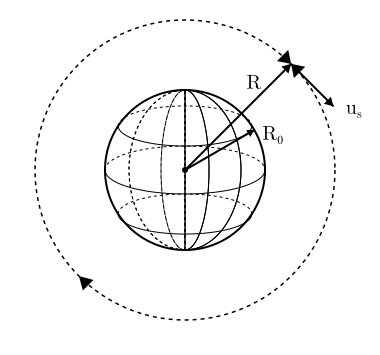

In [24]:
Drawing(380, 355, "../images/circular-orbit.svg")
background("white")
origin(Point(185, 170))
sethue("black")

# Planet parameters
R_E = 80  # Planet radius (visual)
R_orbit = 150  # Orbital radius (visual)
perspective = 0.3  # Flattening factor for 3D perspective

# === Planet outline ===
setline(2)
circle(Point(0, 0), R_E, :stroke)

# === Planet surface texture (3D globe effect) ===
setline(1)

# Longitude lines (meridians) - vertical ellipses through the poles
for x_factor in [0.3, 0.7]
    # Front/visible part (right side where x > 0)
    setdash("solid")
    move(Point(0, -R_E))
    for t in range(0, π, length=50)
        x = R_E * x_factor * sin(t)
        y = -R_E * cos(t)
        line(Point(x, y))
    end
    strokepath()
    
    # Back/hidden part (left side where x < 0) - dashed
    setdash([3.0, 3.0])
    move(Point(0, R_E))
    for t in range(π, 2π, length=50)
        x = R_E * x_factor * sin(t)
        y = -R_E * cos(t)
        line(Point(x, y))
    end
    strokepath()
end

# Also add mirrored longitude lines on the left side
for x_factor in [-0.3, -0.7]
    # Front/visible part (left side where x < 0 for negative x_factor)
    setdash("solid")
    move(Point(0, -R_E))
    for t in range(π, 2π, length=50)
        x = R_E * x_factor * sin(t)
        y = -R_E * cos(t)
        line(Point(x, y))
    end
    strokepath()
    
    # Back/hidden part - dashed
    setdash([3.0, 3.0])
    move(Point(0, R_E))
    for t in range(0, π, length=50)
        x = R_E * x_factor * sin(t)
        y = -R_E * cos(t)
        line(Point(x, y))
    end
    strokepath()
end

# Latitude lines (parallels) - horizontal ellipses
# Equator
# Front/visible part (bottom arc)
setdash("solid")
move(Point(R_E, 0))
for t in range(0, π, length=50)
    x = R_E * cos(t)
    y = R_E * perspective * sin(t)
    line(Point(x, y))
end
strokepath()

# Back/hidden part (top arc) - dashed
setdash([3.0, 3.0])
move(Point(-R_E, 0))
for t in range(π, 2π, length=50)
    x = R_E * cos(t)
    y = R_E * perspective * sin(t)
    line(Point(x, y))
end
strokepath()

# Upper and lower latitudes
for y_factor in [-0.55, 0.55]
    y_center = R_E * y_factor
    x_radius = sqrt(R_E^2 - y_center^2)
    
    # Front/visible part (bottom arc)
    setdash("solid")
    move(Point(x_radius, y_center))
    for t in range(0, π, length=50)
        x = x_radius * cos(t)
        y = y_center + x_radius * perspective * sin(t)
        line(Point(x, y))
    end
    strokepath()
    
    # Back/hidden part (top arc) - dashed
    setdash([3.0, 3.0])
    move(Point(-x_radius, y_center))
    for t in range(π, 2π, length=50)
        x = x_radius * cos(t)
        y = y_center + x_radius * perspective * sin(t)
        line(Point(x, y))
    end
    strokepath()
end

setdash("solid")

# Center dot
circle(Point(0, 0), 3, :fill)

# === Orbital path (dashed) ===
setline(1.5)
setdash("dash")
circle(Point(0, 0), R_orbit, :stroke)
setdash("solid")

# === Orbital direction arrowhead (halfway around from satellite) ===
sat_angle = π/4  # 45 degrees from horizontal (upper right)
# Arrow position: halfway around the orbit (π radians away), in counterclockwise direction
arrow_angle = -sat_angle + π  # Opposite side of orbit
arrow_pos = Point(R_orbit * cos(arrow_angle), R_orbit * sin(arrow_angle))
# Tangent direction at arrow position (counterclockwise)
arrow_tangent = arrow_angle + π/2
draw_arrowhead(arrow_pos, arrow_tangent, headsize=15)

# === Satellite position (at angle) ===
sat_pos = Point(R_orbit * cos(-sat_angle), R_orbit * sin(-sat_angle))

# Satellite as bowtie/hourglass X shape (rotated 90°), filled
setline(2)
sat_width = 8    # Half-width perpendicular to velocity
sat_height = 12  # Half-height in velocity direction

tangent_angle = -sat_angle + π/2
radial_angle = -sat_angle

# Four corners of the bowtie
# Forward point (in velocity direction)
fwd_top = Point(
    sat_pos.x + sat_height * cos(tangent_angle) + sat_width * cos(radial_angle),
    sat_pos.y + sat_height * sin(tangent_angle) + sat_width * sin(radial_angle)
)
fwd_bot = Point(
    sat_pos.x + sat_height * cos(tangent_angle) - sat_width * cos(radial_angle),
    sat_pos.y + sat_height * sin(tangent_angle) - sat_width * sin(radial_angle)
)
# Backward point (opposite velocity direction)
bwd_top = Point(
    sat_pos.x - sat_height * cos(tangent_angle) + sat_width * cos(radial_angle),
    sat_pos.y - sat_height * sin(tangent_angle) + sat_width * sin(radial_angle)
)
bwd_bot = Point(
    sat_pos.x - sat_height * cos(tangent_angle) - sat_width * cos(radial_angle),
    sat_pos.y - sat_height * sin(tangent_angle) - sat_width * sin(radial_angle)
)

# Draw the satellite as two filled triangles (bowtie shape)
# Forward triangle
poly([sat_pos, fwd_top, fwd_bot], :fill)
# Backward triangle
poly([sat_pos, bwd_top, bwd_bot], :fill)

# === Velocity arrow (tangent to orbit) ===
setline(2)
vel_length = 60
vel_end = Point(sat_pos.x + vel_length * cos(tangent_angle), sat_pos.y + vel_length * sin(tangent_angle))
draw_arrow(sat_pos, vel_end, headsize=10)

# === R arrow (from center to satellite) ===
setline(2)
draw_arrow(Point(0, 0), sat_pos, headsize=10)

# === R_E arrow (from center to planet surface) ===
setline(2)
R_E_angle = -π/6
R_E_end = Point(R_E * cos(R_E_angle), R_E * sin(R_E_angle))
draw_arrow(Point(0, 0), R_E_end, headsize=8)

# === Labels ===
fontsize(20)

text(L"u_s", Point(vel_end.x + 20, vel_end.y + 5), halign=:center, valign=:middle)

# R label - in empty space above arrow
text(L"R", Point(R_orbit/2 * cos(-sat_angle) + 15, R_orbit/2 * sin(-sat_angle) - 35), halign=:center, valign=:middle)

# R_0 label - just past the planet radius, next to the arrow
text(L"R_0", Point(R_E * cos(R_E_angle) + 18, R_E * sin(R_E_angle) + 5), halign=:center, valign=:middle)

finish()
preview()